# COGS 108 - Final Project 

# Overview

This project is designed to see if the number of health code violations in specific zipcodes in NC can be explained by median household income in dollars.

A linear model was fit to the data to determine that median household income in dollars does not signifigantly explain the variation in number of health code violations.

# Name & PID

- Name: Samir Navani
- PID: A13351282

# Research Question

Can you predict how many restraunt health code violations there will be in a zip code given the median household income in the state of NC?

## Background and Prior Work

References (include links):
- 1) https://arxiv.org/pdf/1910.04906.pdf
- 2) https://github.com/drivendataorg/keeping-it-fresh/tree/17fa93f5ecafa0793ee005abd22092c173406479/1st-place/code

The first reference is to a paper describing the predictive model that the city of Chicago used to predict the type of violation that a restraunt has. They used 16 feature variables describing the establishment. Their target variable was to predict whether or not an establishment has a critical violation. This analysis is different from mine because I am not taking into account features about the estabishment, instead I am taking into account a feature about the community.

The second reference is to a github repository from a contest in predicting restraunts that have health code violations. Again, this analysis takes into account factors about the restraunt but also takes into account reviews.

# Hypothesis


**Hypothesis:** The number of health code violations for restraunts in North Carolina can be predicted using the median household income dollars in specific areas.

**Reasoning:** Restraunts in areas that are not as wealthy as others may try to save costs which would lead to a health code violatoin.

# Dataset(s)

To answer the research question we need to know how many healh code violations (HCV) there are within each zip code. We also need to know the median household income dollars (MHID) for each zipcode as well.

Then we can figure out if there is a relation between MHID and HCV.

- Dataset Name: 'inspections.csv'
- Link to the dataset: From professor
- Number of observations: 11985

'inspections.csv' has data pertaining to which establishments recieved HCV in specific zip codes. Since each row is a HCV, we are interested in how many HCV occur for each zipcode.

- Dataset Name: 'zipcodes.csv'
- Link to the dataset: From professor
- Number of observations: 38

'zipcodes.csv' records the MHID per zipcode in North Carolina.

Both datasets will be merged based on the zipcode. This will result in a new dataset where for each zipcode, we will know the total number of HCV and MHID.

# Setup

In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

In [2]:
# Import datasets

inspections = pd.read_csv('data/inspections.csv')
zipcodes = pd.read_csv('data/zipcodes.csv')

The columns we are interested in for 'inspections.csv' in is 'zipcode'. We only want the rows that are restraunts.

The columns we are interested in for 'zipcodes.csv' is 'median_family_income_dollars'

# Data Cleaning

Both datasets had no missing values.

To analyze the data, the total number of HCV per zipcode was found. This was merged with the MHID per zipcode.

**Steps:** <br><br>
1) Filter the rows of HCV to those of 'facilitytype' equal to 'Restraunt'. This selects all HCV that occured in restraunts only
<br><br>

2) Find the number of restraunts that have violations per zipcode <br><br>

3) Extract the data from above and 'zipcode' into a new dataframe <br><br>
4) Extract the zipcode and median_family_household_income from zipcodes.csv and make a new dataframe <br><br>
5) Merge the two dataframes based on the zipcodes they have in common <br><br>
6) Check for any missing values

In [3]:
# Select rows that are only restraunts
inspections = inspections[inspections['facilitytype'] == 'Restaurant']

# Get the value counts for the zip code
zipcode_col = inspections['zip']
zip_count = pd.DataFrame(zipcode_col.value_counts())
zip_count.reset_index(inplace=True)
zip_count.columns = ['zip', 'count']


In [4]:
# Extract the zipcode and median_family_income_dollars from the zipcode data
zip_MHID = zipcodes.loc[:, ['zip', 'median_household_income_dollars']]

In [5]:
# Check how many zipcodes are in each dataframe

num_zip_MHID = len(zip_MHID['zip'].value_counts())

num_zip_count = len(zip_count['zip'].value_counts())

print('number of zipcodes in inspections.csv:', num_zip_MHID)
print('number of zipcodes in zipcodes.csv:', num_zip_count)

number of zipcodes in inspections.csv: 38
number of zipcodes in zipcodes.csv: 45


Since there are more zipcodes in the 'zipcodes.csv', we will use only the data that is common between both. This is because we don't have inspection data on the zipcodes that are not in inspection.csv

In [6]:
df = pd.merge(zip_count, zip_MHID, on='zip', how='inner')
df.columns = ['zip', 'count', 'MHID']
df.head()

,zip,count,MHID
0,27511,950,67392
1,27609,661,53640
2,27603,610,54889
3,27587,602,83416
4,27607,601,53825


In [7]:
# Check to make sure there are no NaN values
df.isnull().values.any()

False

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [8]:
df.head()

,zip,count,MHID
0,27511,950,67392
1,27609,661,53640
2,27603,610,54889
3,27587,602,83416
4,27607,601,53825


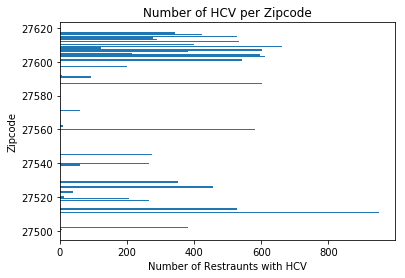

In [9]:
# Graph to see if some areas have more HCV than other areas

plt.barh(df['zip'], df['count'])
plt.title('Number of HCV per Zipcode')
plt.xlabel('Number of Restraunts with HCV')
plt.ylabel('Zipcode')
plt.show()

There seems more restraunts with healthcode violations with zipcodes in the range of 27600 to 27620. This is due to more restraunts existing in that area. Those zipcodes are associated with 'Raleigh', the capital of North Carolina.

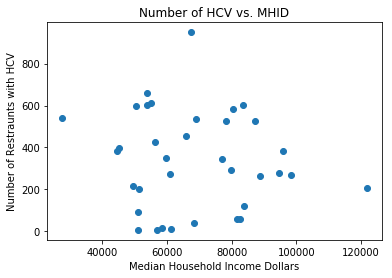

In [10]:
# Visualizations

plt.scatter(df['MHID'], df['count'])
plt.title('Number of HCV vs. MHID')
plt.xlabel('Median Household Income Dollars')
plt.ylabel('Number of Restraunts with HCV')
plt.show()

There doesn't seem to be any overall shape to the data between MHID and number of HCV. This doesn't support the hypothesis that the number of restraunt violations in a zipcode can be explained by the median household income dollars.

We will still perform linear regression to see how the model does.

In [11]:
df.corr()

,zip,count,MHID
zip,1.000000,0.191977,-0.370389
count,0.191977,1.000000,-0.099004
MHID,-0.370389,-0.099004,1.000000


The correlation between MHID and count is -0.099 which is very small. It is unlikely that the linear model will perform well.

In [12]:
outcome, predictors = patsy.dmatrices('count ~ MHID', df)

In [13]:
# Fit the linear model

mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [14]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.3267
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.572
Time:                        20:12:21   Log-Likelihood:                -239.87
No. Observations:                  35   AIC:                             483.7
Df Residuals:                      33   BIC:                             486.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.4975    147.874      2.844      0.0

The model calculated was: 

Number of HCV = 420.4975 + -0.0012 * MHID

Since P > abs(t) is 0.572 and that is greater than an alpha value of 0.05, we can reject the null hypothesis. This means that the median houshold income in dollars does not significantly explain the variation in number of health code violations per zipcode.

The graph below shows the linear model plotted on the original data.

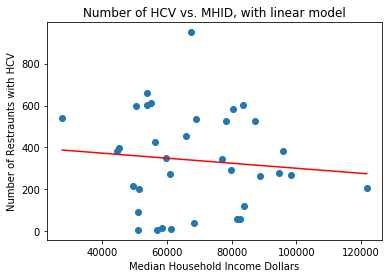

In [15]:
# Visualizations

plt.scatter(df['MHID'], df['count'])
plt.title('Number of HCV vs. MHID, with linear model')
plt.xlabel('Median Household Income Dollars')
plt.ylabel('Number of Restraunts with HCV')

x = np.linspace(min(df['MHID']), max(df['MHID']), 1000)
y =  420.4975 + -0.0012 * x

plt.plot(x, y, color='red')
plt.show()

Displayed above is the number of HCV vs. the MHID. Ontop of the data is the linear model that was previously calculated. As you can see, the linear model doesn't fit the data well.

# Ethics & Privacy

The information used in this analysis comprise of the health code violations and median household income dollars per zip code. Both peices of information are available to the public. Therefor, it is ethical to use it in this analysis.

Since the data was provided by my Professor, I do have permission to use it. However, like all public datsets, I do not know the accuracy and authenticity of the data.

Some of the biases in the dataset are that there are a large amount of restraunts and HCV from Raleigh alone. This made it hard to do the analysis because the MHID would generally be the same throughout Raleigh. 

In addition to this, if the analysis did show that poorer areas had more HCV than others, it may not be in the department of health's best interest to inspect restraunts in poor neighborhoods. This could come off to the public as unjust and biased.

To deal with these problems, I would collect more data -- specifically from restraunts not in Raleigh. This would make the dataset more balanced and would result in a more accurate analysis.

# Conclusion & Discussion

The project was aimed to see if poorer areas have more health code violations than better off areas. The reasoning for this hypothesis is because restraunts in poorer areas might try to cut corners in costs resulting in a health code violation.

The analysis consisted of fitting a linear model to the data.

After the analysis was complete, it was determined that the median household income in dollars doesn not signifigantly explain the variation in number of health code violations per zipcode.

However, the data wasn't perfect and there was an unproportional number of restraunts from Raleigh.

This analysis' impact on society is that health code inspectors do not need to go to poor areas to find more restraunts with health code violations.